<div align="center">

# **Camintas Aleatorias**
    
</div>

<div>
    Una caminata aleatoria simple es un proceso estocástico a tiempo discreto $\{X_n : n = 0,1,\ldots\}$
</div>

<img src="https://raw.githubusercontent.com/RodrigoS624/Estoc-sticos/main/images/Imagen%20Caminata%20Aleatoria.jpeg" width="500">


<div>
Es decir, si iniciamos en el estado 0, al siguiente tiempo (movimiento) el proceso puede pasar al estado:
    
$+1$ con probabilidad $p$,  o al estado
$-1$ con probabilidad $q$, en donde $p+q=1$

</div>

<div>
    A continuación, ejemplificaremos la caminata con un pequeño codigo para poder extraer algunos conceptos claves 
    
    que se pueden derivar tras su  observación
</div>

## Codificación de la Caminata Aleatoria

!pip install matplotlib

In [ ]:
import random as rd
import matplotlib.pyplot as plt

### Primero se le pide al usuario ponderar las probabilidades de q y q:

In [10]:
def obtener_probabilidades():
    
    #Pedimos al usuario que asigne el valor de p 
    while True:
        try:
            entrada = input("Ingresa la probabilidad (entre 0 y 1) de 'p' (moverse a la derecha): ")
            
            # Transformamos el valor a float
            p = float(entrada)
            
            # Verificamos que en efecto p este entre 0 y 1
            if 0 <= p <= 1:

                #Aqui usamos la propiedad mencionada anteriormente, p+q=1
                q = 1 - p
                return p, q
            else:
                print("El valor debe ser un número entre 0 y 1. Inténtalo de nuevo")
                
        except ValueError:
            # Esto captura si el usuario escribe letras o símbolos en lugar de números
            print("Error: Entrada no válida. Por favor ingresa un número decimal.")

p, q = obtener_probabilidades()

#Le mostramos al usuario como quedaron sus probabilidades
print("-" * 30)
print(f"Probabilidad de moverse a la derecha (p): {p}")

#Usamos .2f para mostrar solamente 3 decimales
print(f"Probabilidad de moverse a la izquierda (q): {q:.2f} (Calculado como 1 - {p})")
print("-" * 30)

Ingresa la probabilidad (entre 0 y 1) de 'p' (moverse a la derecha):  .5


------------------------------
Probabilidad de moverse a la derecha (p): 0.5
Probabilidad de moverse a la izquierda (q): 0.50 (Calculado como 1 - 0.5)
------------------------------


### Ahora simularemos 1000 movimientos:

In [13]:
posicion_inicial = 0
posicion_actual = posicion_inicial
pasos_totales = 1000

trayectoria = [posicion_inicial]

print(f"Simulando {pasos_totales} movimientos...")

#Simulamos la caminata aleatoria
for _ in range(pasos_totales):

    #Calculamos a donde se va a mover
    r = rd.random()
    
    if r < p:
        posicion_actual += 1
    else:
        posicion_actual -= 1
    
    #Guardamos cada movimiento en una lista
    trayectoria.append(posicion_actual)

print("-" * 30)
print(f"Posición inicial: {posicion_inicial}")
print(f"Posición actual (final): {posicion_actual}")
print("-" * 30)

Simulando 1000 movimientos...
------------------------------
Posición inicial: 0
Posición actual (final): -2
------------------------------


### Ahora proporcionaremos la grafica de la simulación:

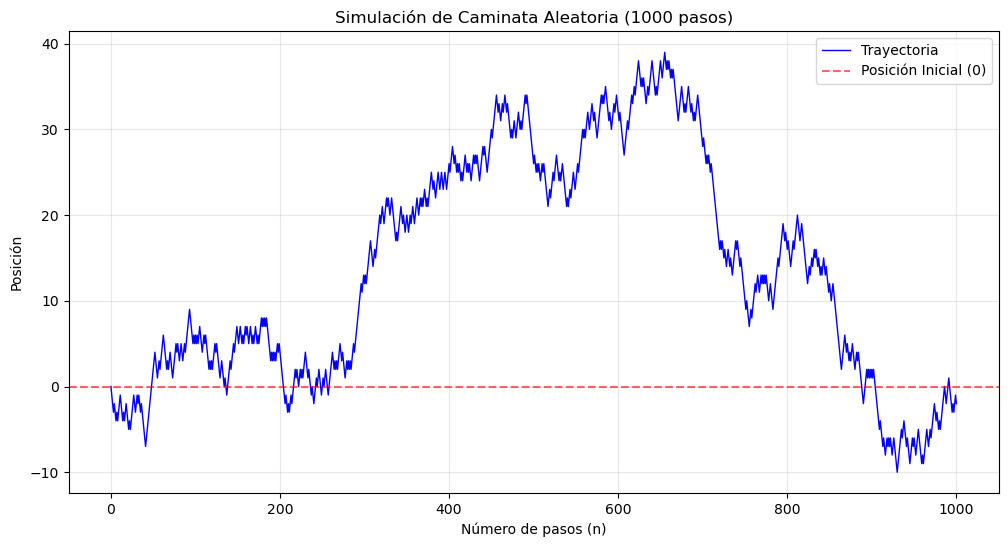

In [14]:
plt.figure(figsize=(12, 6))

#Dato para mi jeje: < range(len(trayectoria)) > genera los números del 0 al 1000 para el eje X
plt.plot(range(len(trayectoria)), trayectoria, color='blue', linewidth=1, label='Trayectoria')


#Otro dato para mi jeje: < axhline > dibuja una línea horizontal en el eje Y indicado
plt.axhline(y=posicion_inicial, color='red', linestyle='--', alpha=0.6, label='Posición Inicial (0)')

plt.title(f"Simulación de Caminata Aleatoria ({pasos_totales} pasos)")
plt.xlabel("Número de pasos (n)")
plt.ylabel("Posición")
plt.grid(True, alpha=0.3)
plt.legend()              

plt.show()

### Con base a la simulación y la gráfica, proporcionamos algunos datos que responden a las siguientes preguntas:

- ¿Cuántas veces regresamos a la posicion inicial?
- ¿Cuál es la distancia máxima a la que se llega?
- Si el punto regresa al origen, ¿en cuánto tiempo (pasos) regresa al origen por primera vez?
- ¿En promedio cuánto se aleja del origen?

In [16]:
#Registramos cuantas veces regresó al origen (le restamos 1 para no contar la posición inicial)
regresos_al_origen = trayectoria.count(0) - 1

posicion_maxima = max(trayectoria)
posicion_minima = min(trayectoria)

print("-" * 30)
print(f"Veces que regresó al origen (0): {regresos_al_origen}")
print(f"Distancia más lejana a la derecha: {posicion_maxima}")
print(f"Distancia más lejana a la izquierda: {posicion_minima}")
print("-" * 30)

------------------------------
Veces que regresó al origen (0): 22
Distancia más lejana a la derecha: 39
Distancia más lejana a la izquierda: -10
------------------------------


In [21]:
#Buscamos la primera vez que se volvio a tener 0 en la posición actual
try:
    
    #Otro dato para mi :p : < trayectoria[1:] > busca desde el segundo elemento en adelante
    paso_primer_regreso = trayectoria[1:].index(0) + 1 
    
    resultado_regreso = f"El punto regresó al origen por primera vez en el paso: {paso_primer_regreso}"
    
except ValueError:
    
    resultado_regreso = "El punto NO regresó al origen durante esta simulación."

#Calculamos el promedio de alejamiento
distancias_absolutas = [abs(pos) for pos in trayectoria]
promedio_distancia = sum(distancias_absolutas) / len(distancias_absolutas)

print("-" * 30)
print(resultado_regreso)
print(f"En promedio, se aleja: {promedio_distancia:.2f} pasos del origen")
print("-" * 30)

------------------------------
El punto regresó al origen por primera vez en el paso: 48
En promedio, se aleja: 15.11 pasos del origen
------------------------------


<div align="center">

## Conclusión

</div>

Con base al codigo anterior respondamos algunas preguntas naturales que surgen 

tras observar el comportamiento de las caminatas aleatorias:

### Relación con las Cadenas de Markov

Tras observar el comportamiento en la gráfica surge la duda de si el comportamiento de las camintas aleatorias se podría identificar como una cadena de markov.

Mi respuesta para esto es un si. 

Ya que como podemos observar dentro de nuestra codificación, en lo que nos centramos es en el presente para poder determinar lo que acontecera a futuro, 
es decir, el comportamiento de la caminata posee la propiedad de falta de memoria de las cadenas de markov.

### Analisis de la Distribución de Probabilidad 

La siguiente pregunta no es tan natural que surja cuando observamos el comportamiento de la caminata, pero tratemos de darle una respuesta.

¿Con base al programa podemos obtener la funcón de distribución del modelo?

Proporcionare mi respuesta, más le pido al lector que no la tome como verdad absoluta, si no mas bien, como una opinion del creador de este documento
ya que no estoy seguro en totalidad de si mi juicio es correcto.

No, o al menos no con observarlo un par de veces, ya que sería como determinar que yo siempre llego tarde a clase con verme solo un día llegar a la escuela jeje.
Pero puede que iterando muchiiisimas veces el programa podamos determinar un aproximado de la distribución de la probabilida. Pero considero que es mejor opción crear el modelo matematico del comportamiento de la caminata y junto con las herramientas adecudas obtener el valor exacto de la distribución.

<p style="text-align: right;">
ESFM
</p>

<p style="text-align: right;">
Rodrigo Sosa Mendoza
</p>

<p style="text-align: right;">
Matemática Algoritmica
</p>
